# Pymaceuticals Inc.
---

### Analysis

- After performing an analysis and graphing on the outputs there are three observations that could be made:
    1) Treatment Efficency: The bar graph "Mouse Timepoints Across Drug Regimens" suggests that Capomulin and Ramicane may have better efficency. This conclusion is based on the fact that mice treated with those drugs have more timeponts, or in other words may live longer.
    
    2) Weight vs. Tumor Volume Correlation: The scatter plot with correlation line "Correlation Between Mouse Weight and Average Tumor Volume" shows positive correlation between weight of the mice and the avarage tumor volume. It may suggests that the weight is contributing factor to the growth of the tumor in mice.

    3) Capomulin Treatment for Mice l509: Based on a linear graph "Capomulin Treatment of Mice l509" we can assume its effectiveness. We can observe a significant decrease in tumor volume starting after 20 days of treatment. However, it is important to note that this success may be due to genetic or other individual properties of the l509. The mouse l509 could be used for additional genetic examination to understand what factors contributed to that success.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#Creating a dataframe with all duplicates by ID and Timepoint 
duplicated_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], 
                                                         keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ids = duplicated_mice["Mouse ID"].unique()
duplicated_mice_ids

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
one_mouse_duplicate = duplicated_mice[duplicated_mice["Mouse ID"] == "g989"]
one_mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
# Sort by Timepoint in ascending order
clean_data = clean_data.sort_values(by = "Timepoint")
#Display first 5 values
clean_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1226,n678,Propriva,Male,5,29,0,45.0,0
1229,n763,Placebo,Female,16,25,0,45.0,0
341,v923,Capomulin,Female,19,21,0,45.0,0
338,w150,Capomulin,Male,23,23,0,45.0,0


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

## I decided to use aggregation method as only one were required. See the next cell.

In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Dispalying results
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

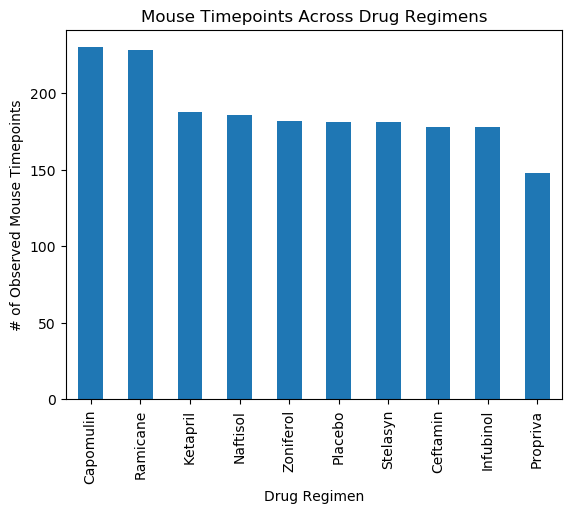

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Calculate the number of rows for Drug Regimens
plot_regiment_df = clean_data["Drug Regimen"].value_counts()

#Create a bar graph 
plot_regiment_df.plot(kind = "bar", xlabel = "Drug Regimen", 
                      ylabel = "# of Observed Mouse Timepoints", 
                      title = "Mouse Timepoints Across Drug Regimens")


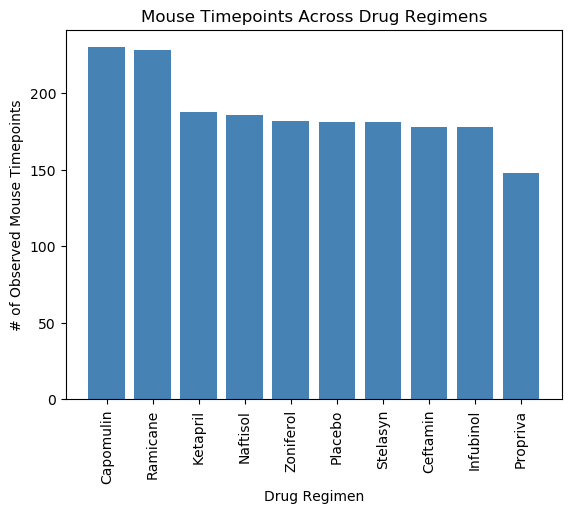

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Plotting the graph.
#Found color name here: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.bar(plot_regiment_df.index, plot_regiment_df.values, color = "steelblue") 

#Adjusting ticks rotation to vetical
plt.xticks(rotation=90)

#Adding labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title ("Mouse Timepoints Across Drug Regimens")
#Show bar graph         
plt.show()

Text(0,0.5,'Sex')

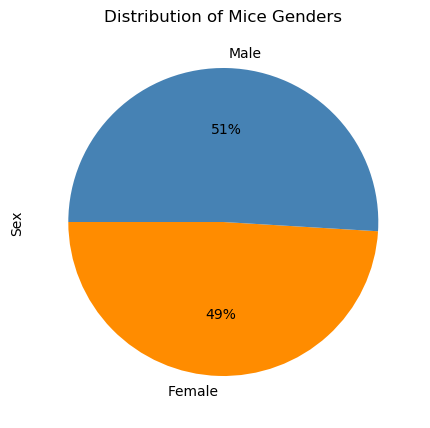

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Creating new dataframe with count of mice grouped by sex
sex_df = clean_data.groupby("Sex")["Mouse ID"].size()

#Establishing colors
colors = ["darkorange", "steelblue"]

#Plotting pie chart
pie_chart  = sex_df.plot(kind="pie", autopct='%1.0f%%', figsize=(5,5), colors = colors, 
                         startangle=180, title = "Distribution of Mice Genders")

#Setting y-label to sex
pie_chart.set_ylabel("Sex")

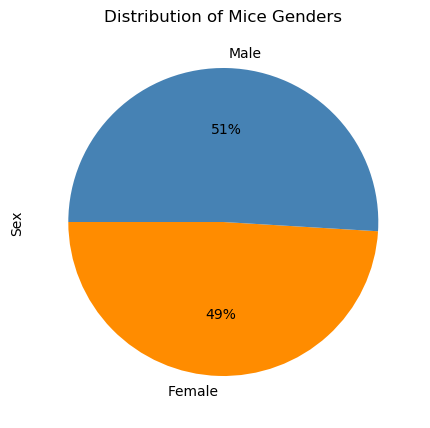

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Establishing colors
colors = ["darkorange", "steelblue"]

#Establishing size of the figure
plt.figure(figsize=(5,5))

#Creating a list(array) of count values
numbers = sex_df.values

#Creating a list(array) of sex names
lable_names = sex_df.index

#Plotting the graph
plt.pie(numbers, labels = lable_names, colors = colors, autopct= "%1.0f%%", startangle = 180)

#Establishing y-label
plt.ylabel("Sex")

#Establishing title 
plt.title("Distribution of Mice Genders")

#Showing the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gr_timep = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(gr_timep, clean_data, on = ["Mouse ID", "Timepoint"], how="left")

In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Creating a for loop
for x in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df["Drug Regimen"] == x]
    tumor_vol = treatment_data["Tumor Volume (mm3)"]
    
    #Add subset
    tumor_list.append(tumor_vol)
    
    #Establishing quartiles 
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Adding possible outlieres to a new object
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    #Printing output
    print(f"{x}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


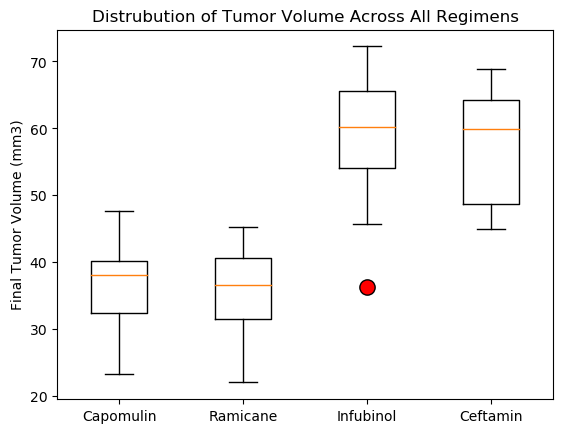

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Plotting box plots
fig1, ax1 = plt.subplots()
#Found customization here: https://matplotlib.org/stable/gallery/statistics/boxplot.html
ax1.boxplot(tumor_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=11))

#Adding names of the treatments
ax1.set_xticklabels(treatments_list)

#Setting y-labels
ax1.set_ylabel("Final Tumor Volume (mm3)")

#Setting the title
plt.title("Distrubution of Tumor Volume Across All Regimens")

#Show the plot
plt.show()

## Line and Scatter Plots

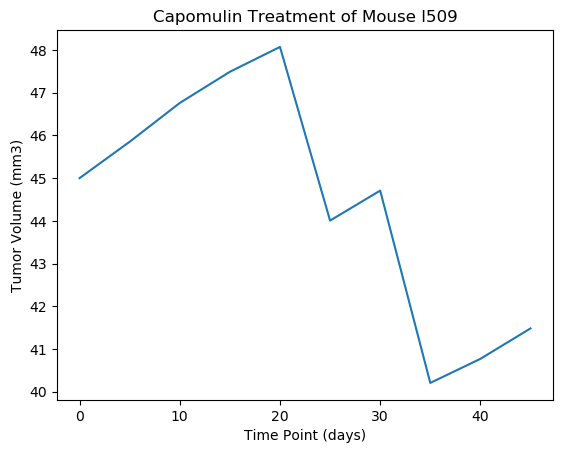

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin 

#Filtering for mice treted with Capomulin
potential_mice = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

#Selecting one mouse 
filtered_data = potential_mice[potential_mice["Mouse ID"] == "l509"]

#Saving timepoints of the selected mouse
timepoint_509 = filtered_data["Timepoint"]

#Saving tumore volume of selected mouse
volume_509 = filtered_data["Tumor Volume (mm3)"]

#Plottiing linear graph
plt.plot(timepoint_509, volume_509)

#Adding x-label
plt.xlabel("Time Point (days)")

#Adding y-label
plt.ylabel("Tumor Volume (mm3)")

#Adding title
plt.title("Capomulin Treatment of Mouse l509")

#Showing the graph
plt.show()

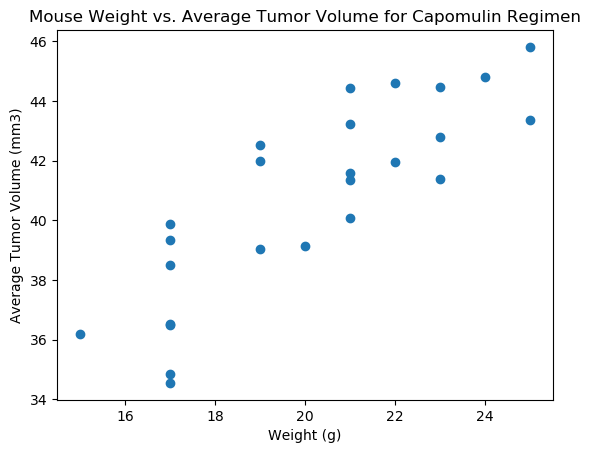

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Calculating average tumor size for mice treated with Capomulin
avg_data = potential_mice.groupby("Mouse ID").mean()

#Saving weight of the mice
weight = avg_data["Weight (g)"]

#Saving average tumore values for mice
avg_volume = avg_data["Tumor Volume (mm3)"]

#Plotting scatter plot
plt.scatter(weight, avg_volume)

#Assigning x-label
plt.xlabel("Weight (g)")

#Assigning y-label
plt.ylabel("Average Tumor Volume (mm3)")

#Assign title
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

#Dispalying the graph
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


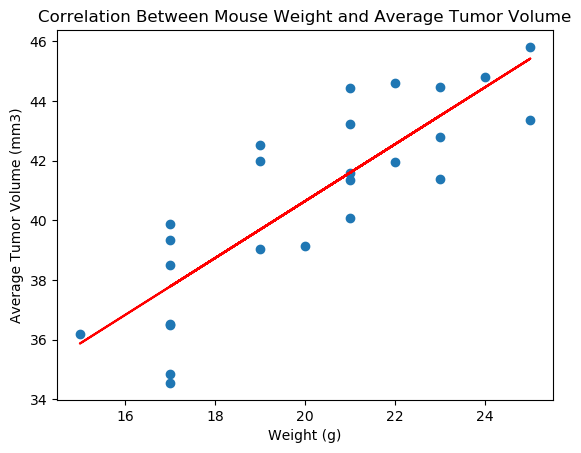

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculating correlation using pearson method
correlation = st.pearsonr(weight, avg_volume)

#Printing message with the result
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Import linregress (for some reasond is not importing with the main body of the package when imported dependencies)
from scipy.stats import linregress

#Preforming linear regresiion between weight and average tumore values
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_volume)

#Calculating regression values to plot the line 
regress_values = weight * slope + intercept

#Plotting scatter plot
plt.scatter(weight,avg_volume)

#Plotting red regression line
plt.plot(weight,regress_values,"r-")

#Assigning x-label
plt.xlabel("Weight (g)")

#Assigning y-label
plt.ylabel("Average Tumor Volume (mm3)")

#Assign title 
plt.title("Correlation Between Mouse Weight and Average Tumor Volume")

#Displaying the graph
plt.show()